#Multi Classification Neural Network of Hyperspectral Image

##Setting Up Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Data Handling

###Importing Data

In [2]:
import pandas as pd
import numpy as np
from scipy.io import loadmat
data = loadmat('/content/drive/MyDrive/Indian_pines.mat')
indian_pines_gt = loadmat('/content/drive/MyDrive/Indian_pines_gt.mat')

###Preparing The Data

In [3]:
#Making the arrays
image = data['indian_pines']# Shape: (Height, Weight, Chanels)
labels = indian_pines_gt['indian_pines_gt']# Shape: (H, W)

#Reshape
# Flattening dimensions while keeping the spectral bands
X = image.reshape(-1, image.shape[2])
y = labels.reshape(-1)

#Remove unlabeled pixels (label == 0)
mask = y > 0
X = X[mask]
y = y[mask]


print(f"X shape: {X.shape}")#(num_pixels_with_label, Spectral bands)
print(f"y shape: {y.shape}")#(num_pixels_with_label,)

X shape: (10249, 220)
y shape: (10249,)


###Data splitting

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###Feature normailzing

In [5]:
from sklearn.preprocessing import MinMaxScaler
# Scaling makes all the data be in the range from [0,1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


## Making the Neural Network

In [10]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score

#This is where it is no longer just forward pass

model = MLPClassifier(
    hidden_layer_sizes=(100,100,30),
    activation='relu',          # ReLU activation
    solver='adam',              # Adam optimizer
    max_iter=500,               # Epochs
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
kappa = cohen_kappa_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Kappa: {kappa:.4f}")
# 62.24 at 100,100,50
# 60.20 at 100,100,75
# 69.61 at 100,100,30
# 0 kappa at 25,35,45(3rd layer)


Accuracy: 69.61%
Kappa: 0.6563


##Confusion Matrix

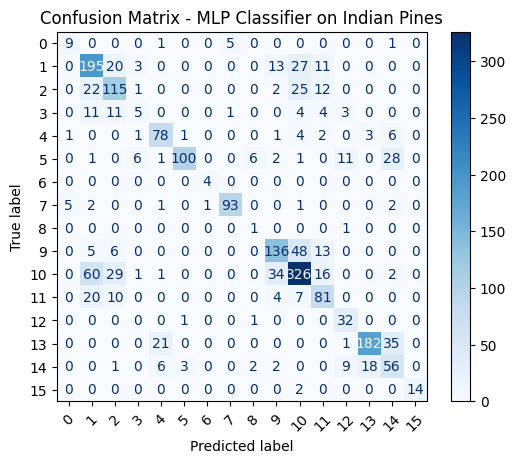

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix - MLP Classifier on Indian Pines")
plt.show()